# <center>『 파이토치 첫걸음 』</center>

<img src="https://www.hanbit.co.kr/data/books/B7818450418_l.jpg" width=30%>

---

# 3장. 선형회귀분석

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#선형회귀분석이란-무엇인가" data-toc-modified-id="선형회귀분석이란-무엇인가-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>선형회귀분석이란 무엇인가</a></span></li><li><span><a href="#손실-함수-및-경사하강법" data-toc-modified-id="손실-함수-및-경사하강법-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>손실 함수 및 경사하강법</a></span></li><li><span><a href="#파이토치에서의-경사하강법" data-toc-modified-id="파이토치에서의-경사하강법-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>파이토치에서의 경사하강법</a></span><ul class="toc-item"><li><span><a href="#데이터-준비" data-toc-modified-id="데이터-준비-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>데이터 준비</a></span></li><li><span><a href="#모델-&amp;-손실함수-준비" data-toc-modified-id="모델-&amp;-손실함수-준비-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>모델 &amp; 손실함수 준비</a></span></li><li><span><a href="#옵티마이저-준비" data-toc-modified-id="옵티마이저-준비-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>옵티마이저 준비</a></span></li><li><span><a href="#학습" data-toc-modified-id="학습-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>학습</a></span></li></ul></li><li><span><a href="#선형회귀-비교-(sklearn-vs-pytorch)" data-toc-modified-id="선형회귀-비교-(sklearn-vs-pytorch)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>선형회귀 비교 (sklearn vs pytorch)</a></span><ul class="toc-item"><li><span><a href="#sklearn" data-toc-modified-id="sklearn-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>sklearn</a></span></li><li><span><a href="#pytorch" data-toc-modified-id="pytorch-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>pytorch</a></span></li></ul></li></ul></div>

--- 

## 선형회귀분석이란 무엇인가

**선형회귀분석**은 간단히 설명하면 **주어진 데이터를 가장 잘 설명하는 직선 하나를 찾는 것**이라고 할 수 있습니다.  
x와 y라는 데이터가 주어졌을 때, y = w * x + b 라는 직선의 방정식에서 데이터를 가장 잘 표현하는 변수 w와 b를 찾는다는 뜻입니다. (이때 w는 가중치, b는 편차 입니다.)
- 단순선형회귀: 하나의 독립변수
- 다중선형회귀: 여러 개의 독립변수

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbxZCVY%2FbtqzMfBWGeT%2F8Q9swKxQNTmizU3Or10Zn0%2Fimg.png" width=50%>

**파이토치(PyTorch)**는 2017년 초에 공개된 딥러닝 프레임워크로 연구자들이 쉽게 GPU를 활용하여 인공 신경망 모델을 만들고 학습시킬 수 있게 도와줍니다. 파이토치는 파이썬으로 작성되어 파이썬의 언어 특징을 많이 가지고 있습니다.

## 손실 함수 및 경사하강법

데이터를 가장 잘 표현하기 위해서는 어떤 w와 b의 쌍에 대해서 데이터와 얼마나 잘 맞는지 수치적으로 표현할 수 있어야 합니다. **최적의 매개변수(w와 b)를 찾기 위한 방법**으로는 무엇이 있을까요?  

1) 먼저 무작위로 w와 b를 뽑아서 구한 예측값(y hat)과 실제값(y)를 비교하여 가장 작은 값을 구할 수 있습니다. 이는 모든 범위에서 찾아야 하기 때문에 비효율적입니다.  

2) 따라서 **경사하강법(gradient descent)**을 사용합니다. 주어진 w에서 경사를 구하고 이를 통해 지속적으로 w를 업데이트함으로써 오차의 극솟값을 찾을 수 있습니다.

<img src="https://wikidocs.net/images/page/21670/%EC%A0%91%EC%84%A0%EC%9D%98%EA%B8%B0%EC%9A%B8%EA%B8%B01.PNG" width=40%>

## 파이토치에서의 경사하강법

파이토치에서는 데이터의 기본 단위로 **텐서(tensor)**라는 것을 사용합니다. 텐서는 다차원 배열(array)이라고 정의할 수 있습니다.

In [1]:
import torch

**torch.Tensor**를 통해 임의의 난수 값을 가진 2 x 3 형태의 텐서를 생성할 수 있습니다.

In [2]:
X = torch.Tensor(2, 3)
X

tensor([[0., 0., 0.],
        [0., 0., 0.]])

**torch.tensor** 함수에 값의 배열을 전달해주면 그 값들이 배열에 있는 인수들로 초기화됩니다.

In [3]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
X

tensor([[1, 2, 3],
        [4, 5, 6]])

**to(device)**를 이용해 CPU에 있는 데이터, 변수, 모델 등을 GPU로 넘길 수 있습니다.

```python
# CPU to GPU
device = "cuda"
X.to(device)
```

**torch.tensor** 함수는 인수로 **data, dtype, device, requires_grad** 등을 받습니다.  
**data**에는 앞서 본 것처럼 배열이 들어가고, **dtype**에는 데이터를 저장할 자료형이 들어갑니다. 자료형의 기본값은 FloatTensor입니다. 또한 GPU용 텐서 자료형도 지원합니다. 이어서 **device**는 이 텐서를 어느 기기에 올릴 것인지 명시합니다. 마지막으로 **requires_grad**는 이 텐서에 대한 기울기를 저장할지 여부를 지정합니다.

<img src="https://wikidocs.net/images/page/52846/newimage.png">

다음은 z = 2 * x^2 + 3 이라는 식에서 x에 대한 기울기를 구하는 코드입니다. 다른 변수를 통해 계산되는 y나 z가 아니라 그 자체가 값인 x와 같은 노드를 잎 노드라고 합니다. 잎 노드인 x에 대해서만 결과값(기울기)이 리턴됩니다.

In [4]:
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)
y = x**2
z = 2*y + 3

target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target)) # z와 목푯값인 target에 대한 손실 함수
loss.backward() # x에 대한 기울기 계산

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


C:\Users\kmmnj\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if __name__ == '__main__':


다음은 선형회귀분석 모델을 만들어서 기울기를 계산하고 w, b를 업데이트 하는 전체 과정을 담은 코드를 보겠습니다.

In [5]:
import torch
import torch.nn as nn # torch.nn에는 신경망 모델들이 포함되어 있음 / 레이어 쌓는 것
import torch.optim as optim # 경사하강법 알고리즘
import torch.nn.init as init # 텐서에 초깃값을 주기 위한 함수 포함

### 데이터 준비

필요한 라이브러리를 임포트하고 데이터를 생성합니다.

In [6]:
num_data = 1000 # 사용할 데이터의 수
num_epoch = 500 # 경사하강법 반복 횟수

x = init.uniform_(torch.Tensor(num_data, 1), -10, 10) # -10부터 10까지 숫자 중에 무작위로 num_data 수만큼 생성
noise = init.normal_(torch.FloatTensor(num_data, 1), std=3) # 현실성 반영을 위해 노이즈를 추가한 것
y = 2*x + 3
y_noise = y + noise

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

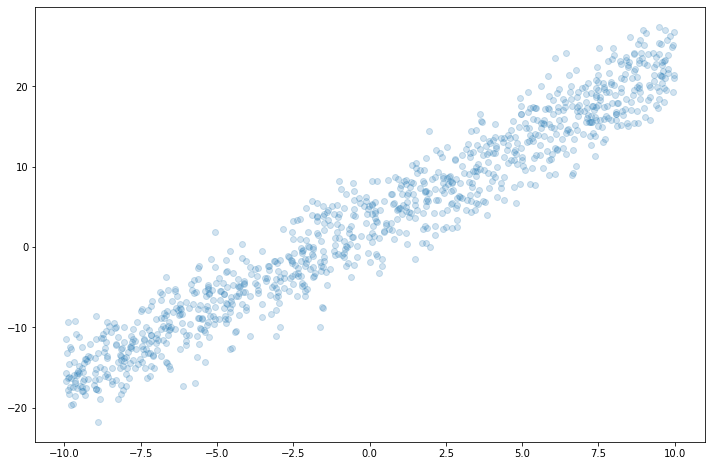

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(x, y_noise, alpha=0.2)
plt.show()

### 모델 & 손실함수 준비

데이터가 준비되었으니 선형회귀 모델을 만듭니다. 파이토치에서 선형회귀 모델은 **nn.Linear()**라는 함수로 구현되어 있습니다.

In [9]:
model = nn.Linear(1,1) # 1개의 특성을 가진 x>와 y
loss_func = nn.L1Loss() # L1 손실(차이의 절댓값의 평균)

그런 다음에는 경사하강법을 사용하기 위해 optimizer를 불러옵니다.  
- model.parameters() : 최적화할 변수로 w와 b 전달 (requires_grad가 True인 가중치의 개수)
- lr : 학습률

### 옵티마이저 준비

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 학습

경사하강법을 사용한 최적화 과정을 num_epoch 수만큼 반복하며, 각 반복 시 지난번에 계산했던 기울기를 0으로 초기화하는 optimizer.zero_grad()를 실행합니다. 기울기를 초기화해야 새로운 가중치와 편차에 대해서 새로운 기울기를 구할 수 있기 때문입니다.

In [11]:
from tqdm.notebook import tqdm

  0%|          | 0/500 [00:00<?, ?it/s]

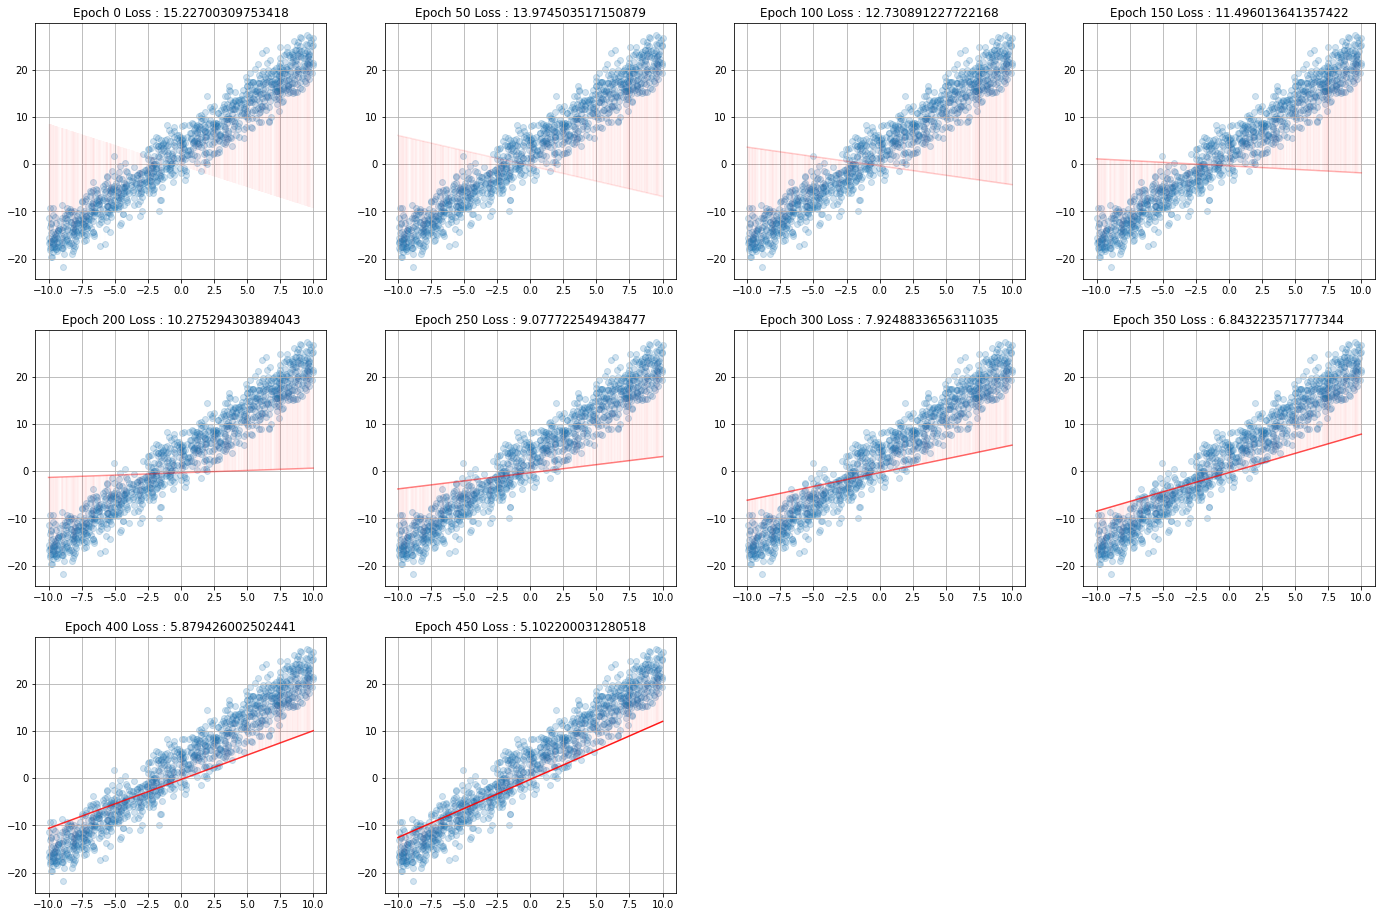

In [12]:
label = y_noise
loss_lst = []

fig = plt.figure(figsize=(24,16))

for n in tqdm(range(num_epoch)):
    optimizer.zero_grad() # 기울기를 0으로 초기화
    output = model(x)
    
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step() # 변수들의 기울기 업데이트
    
    if n % 50 == 0:
#         print(loss.data)
        
        plt.subplot(3, 4, n//50 + 1)
        plt.scatter(x, y_noise, alpha=0.2)
        plt.plot([-10, 10], model(torch.Tensor([[-10],[10]])).squeeze().detach().numpy(), 
                 color='r', alpha=(n/num_epoch))
        
        for i in range(num_data):
            y_true = y_noise[i].item()
            y_pred = model(torch.Tensor([x[i]])).detach().numpy()
            plt.vlines(x[i],min(y_true,y_pred), max(y_true, y_pred), color='red', alpha=0.01)
        
        plt.title(f"Epoch {n} Loss : {loss.item()}")
        plt.grid(True)
    
    loss_lst.append(loss.data.item())

plt.show()

In [13]:
param_list = list(model.parameters())
print(param_list[0].item(), param_list[1].item())

1.3918348550796509 -0.24674414098262787


model(torch.Tensor([[-10],[10]])).squeeze().detach().numpy()의 의미를 이해해보겠습니다.

In [14]:
model(torch.Tensor([0]))

tensor([-0.2467], grad_fn=<AddBackward0>)

In [15]:
model(torch.Tensor([0])).detach()

tensor([-0.2467])

In [16]:
model(torch.Tensor([0])).detach().numpy()

array([-0.24674414], dtype=float32)

loss가 줄어드는 것을 시각화해보겠습니다.

In [17]:
loss_df = pd.DataFrame(loss_lst)

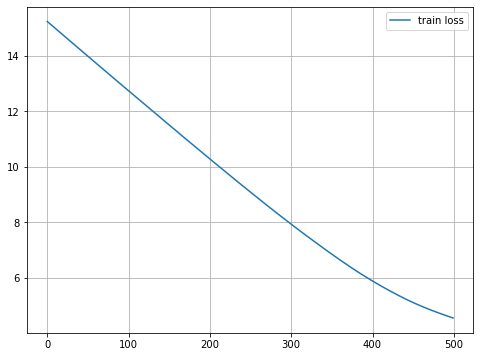

In [18]:
loss_df.plot(figsize=(8,6))
plt.legend(["train loss"])
plt.grid(True)
plt.show()

## 선형회귀 비교 (sklearn vs pytorch)

### sklearn

In [19]:
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

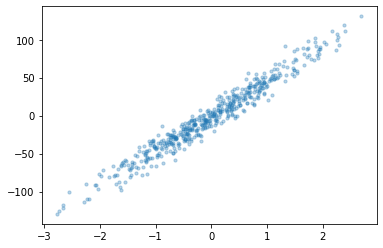

In [20]:
X, y, c = make_regression(n_samples=500, n_features=1, bias=0, noise=10, coef=True, random_state=0)
plt.scatter(X, y, s=10, alpha=0.3)
plt.show()

In [21]:
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

LinearRegression()

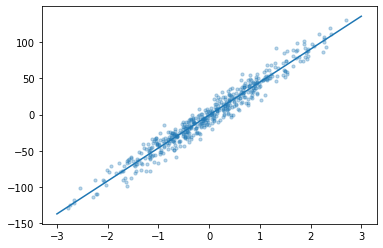

In [22]:
plt.scatter(X, y, s=10, alpha=0.3)
plt.plot([-3, 3], model_sklearn.predict([[-3],[3]]).squeeze())
plt.show()

### pytorch

In [23]:
import torch
import torch.nn as nn
import torch.optim

In [24]:
model_torch = nn.Linear(1,1)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model_torch.parameters(), lr=0.1)

In [26]:
X_tensor = torch.FloatTensor(X)
label = torch.FloatTensor(y)
loss_lst2 = []

for n in range(num_epoch):
    optimizer.zero_grad() # 기울기를 0으로 초기화
    output = model_torch(X_tensor).squeeze()
    
    loss = loss_func(label, output)
    loss.backward()
    optimizer.step() # 변수들의 기울기 업데이트
    loss_lst2.append(loss.data.item())

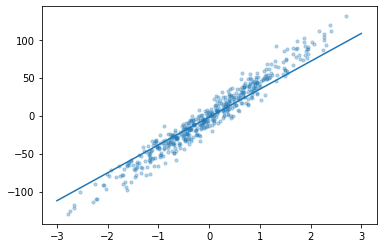

In [27]:
plt.scatter(X, y, s=10, alpha=0.3)
plt.plot([-3, 3], model_torch(torch.Tensor([[-3], [3]])).squeeze().detach().numpy())
plt.show()

비교

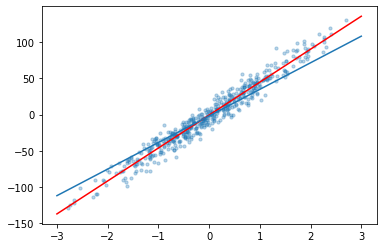

In [28]:
plt.scatter(X, y, s=10, alpha=0.3)
plt.plot([-3, 3], model_sklearn.predict([[-3],[3]]).squeeze(), color="red")
plt.plot([-3, 3], model_torch(torch.Tensor([[-3], [3]])).squeeze().detach().numpy())
plt.show()